In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [51]:
data = pd.read_csv('Lab4.csv')
data.head()

,WAVEFORM1,WAVEFORM2,WAVEFORM3,WAVEFORM4,WAVEFORM5,WAVEFORM6,WAVEFORM7,WAVEFORM8,WAVEFORM9,WAVEFORM10,...,S4,RATIO B_A,RATIO E_A,DLASI1,DLASI2,RATIO 1_2,MAP,SBP,DBP,SBP-DBP
0,-1.770000e-19,0.001339,0.005419,0.011661,0.021006,0.032993,0.047991,0.066083,0.087019,0.111340,...,6.0992,1.1027,0.22757,4.6421,0.003384,0.008930,86.836,109.85,73.901,35.949
1,-1.880000e-19,0.000627,0.003567,0.008593,0.016736,0.027438,0.040993,0.057563,0.076998,0.099823,...,1.5811,1.1049,0.16482,4.8910,0.000809,0.004969,87.973,111.12,74.536,36.584
2,-1.700000e-19,0.001029,0.004519,0.009898,0.018275,0.028943,0.042617,0.058983,0.078354,0.100700,...,1.5712,1.1168,0.17008,3.9658,0.000746,0.004906,88.654,112.63,74.194,38.440
3,-1.730000e-19,0.001412,0.005649,0.012002,0.021596,0.033729,0.049152,0.067494,0.089018,0.113670,...,5.5451,1.0647,0.19461,4.6613,0.002999,0.008236,84.680,110.49,68.724,41.762
4,-2.900000e-20,0.007238,0.019744,0.033423,0.048526,0.065671,0.086369,0.109490,0.134660,0.162220,...,8.3450,1.1184,0.15685,3.9018,0.004178,0.007735,83.888,105.60,74.536,31.065


In [46]:
data.shape

(32331, 147)

Dropping target variables from dataset.

In [49]:
df = pd.DataFrame(data)
df = data.drop(['SBP', 'DBP', 'SBP-DBP'], axis = 1)
df

,WAVEFORM1,WAVEFORM2,WAVEFORM3,WAVEFORM4,WAVEFORM5,WAVEFORM6,WAVEFORM7,WAVEFORM8,WAVEFORM9,WAVEFORM10,...,S1,S2,S3,S4,RATIO B_A,RATIO E_A,DLASI1,DLASI2,RATIO 1_2,MAP
0,-1.770000e-19,0.001339,0.005419,0.011661,0.021006,0.032993,0.047991,0.066083,0.087019,0.111340,...,1.5708,7.2919,9.8659,6.0992,1.10270,0.22757,4.6421,0.003384,0.008930,86.836
1,-1.880000e-19,0.000627,0.003567,0.008593,0.016736,0.027438,0.040993,0.057563,0.076998,0.099823,...,1.4479,7.0819,13.7340,1.5811,1.10490,0.16482,4.8910,0.000809,0.004969,87.973
2,-1.700000e-19,0.001029,0.004519,0.009898,0.018275,0.028943,0.042617,0.058983,0.078354,0.100700,...,1.9455,7.7153,13.5410,1.5712,1.11680,0.17008,3.9658,0.000746,0.004906,88.654
3,-1.730000e-19,0.001412,0.005649,0.012002,0.021596,0.033729,0.049152,0.067494,0.089018,0.113670,...,1.5281,7.1229,10.4680,5.5451,1.06470,0.19461,4.6613,0.002999,0.008236,84.680
4,-2.900000e-20,0.007238,0.019744,0.033423,0.048526,0.065671,0.086369,0.109490,0.134660,0.162220,...,2.1272,8.3000,11.7830,8.3450,1.11840,0.15685,3.9018,0.004178,0.007735,83.888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32326,2.721700e-04,0.016678,0.056373,0.118160,0.201040,0.300770,0.412430,0.529320,0.644470,0.750860,...,2.3626,11.0110,13.0090,102.7100,0.99157,0.21656,4.6604,0.001644,0.004764,79.044
32327,7.250000e-20,0.013733,0.032482,0.050352,0.071419,0.094565,0.119260,0.146820,0.175720,0.206530,...,2.2179,10.7220,12.9910,11.7300,1.10860,0.40723,4.8342,0.001524,0.004801,82.118
32328,7.380000e-20,0.007136,0.018493,0.031141,0.042997,0.055321,0.068347,0.083403,0.099431,0.115570,...,2.0850,8.9639,9.3141,2.5839,0.92825,0.10385,4.2992,0.002056,0.005202,76.623
32329,1.993400e-04,0.031869,0.115680,0.239750,0.390770,0.549640,0.697750,0.817010,0.893520,0.918370,...,1.2530,59.6910,31.8890,1.6796,1.21040,0.22698,47.6400,0.000535,0.001674,99.540


In [50]:
# Selecting first 32000 rows
data.iloc[:32000]

,WAVEFORM1,WAVEFORM2,WAVEFORM3,WAVEFORM4,WAVEFORM5,WAVEFORM6,WAVEFORM7,WAVEFORM8,WAVEFORM9,WAVEFORM10,...,S4,RATIO B_A,RATIO E_A,DLASI1,DLASI2,RATIO 1_2,MAP,SBP,DBP,SBP-DBP
0,-1.770000e-19,0.001339,0.005419,0.011661,0.021006,0.032993,0.047991,0.066083,0.087019,0.111340,...,6.0992,1.1027,0.227570,4.6421,0.003384,0.008930,86.836,109.85,73.901,35.949
1,-1.880000e-19,0.000627,0.003567,0.008593,0.016736,0.027438,0.040993,0.057563,0.076998,0.099823,...,1.5811,1.1049,0.164820,4.8910,0.000809,0.004969,87.973,111.12,74.536,36.584
2,-1.700000e-19,0.001029,0.004519,0.009898,0.018275,0.028943,0.042617,0.058983,0.078354,0.100700,...,1.5712,1.1168,0.170080,3.9658,0.000746,0.004906,88.654,112.63,74.194,38.440
3,-1.730000e-19,0.001412,0.005649,0.012002,0.021596,0.033729,0.049152,0.067494,0.089018,0.113670,...,5.5451,1.0647,0.194610,4.6613,0.002999,0.008236,84.680,110.49,68.724,41.762
4,-2.900000e-20,0.007238,0.019744,0.033423,0.048526,0.065671,0.086369,0.109490,0.134660,0.162220,...,8.3450,1.1184,0.156850,3.9018,0.004178,0.007735,83.888,105.60,74.536,31.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,2.910000e-20,0.005985,0.015534,0.027222,0.038469,0.049845,0.062209,0.075440,0.090735,0.107460,...,4.5447,1.3103,0.002531,3.8581,0.005751,0.011113,107.060,114.00,103.050,10.953
31996,-3.020000e-21,0.005916,0.015512,0.027996,0.040810,0.054114,0.068893,0.084628,0.102270,0.122350,...,2.0701,1.0898,0.177250,3.6620,0.002914,0.007920,106.720,114.00,101.930,12.071
31997,-8.510000e-20,0.003775,0.010248,0.019225,0.028718,0.039325,0.051800,0.065171,0.080552,0.098292,...,4.3635,1.1563,0.101900,4.6768,0.008384,0.015246,105.560,114.00,101.630,12.376
31998,-2.070000e-19,0.000647,0.002532,0.006491,0.011531,0.018517,0.027873,0.038185,0.050326,0.064808,...,1.6912,1.1170,0.189980,3.7758,0.002649,0.009395,105.460,114.00,100.000,14.003


In [33]:
for i in
df1 = data.iloc[:1000, :]
df1

,WAVEFORM1,WAVEFORM2,WAVEFORM3,WAVEFORM4,WAVEFORM5,WAVEFORM6,WAVEFORM7,WAVEFORM8,WAVEFORM9,WAVEFORM10,...,LASI,S1,S2,S3,S4,RATIO B_A,RATIO E_A,DLASI1,DLASI2,RATIO 1_2
0,-1.770000e-19,0.001339,0.005419,0.011661,0.021006,0.032993,0.047991,0.066083,0.087019,0.111340,...,0.076923,1.5708,7.2919,9.8659,6.0992,1.1027,0.22757,4.6421,0.003384,0.008930
1,-1.880000e-19,0.000627,0.003567,0.008593,0.016736,0.027438,0.040993,0.057563,0.076998,0.099823,...,0.041667,1.4479,7.0819,13.7340,1.5811,1.1049,0.16482,4.8910,0.000809,0.004969
2,-1.700000e-19,0.001029,0.004519,0.009898,0.018275,0.028943,0.042617,0.058983,0.078354,0.100700,...,0.041667,1.9455,7.7153,13.5410,1.5712,1.1168,0.17008,3.9658,0.000746,0.004906
3,-1.730000e-19,0.001412,0.005649,0.012002,0.021596,0.033729,0.049152,0.067494,0.089018,0.113670,...,0.071429,1.5281,7.1229,10.4680,5.5451,1.0647,0.19461,4.6613,0.002999,0.008236
4,-2.900000e-20,0.007238,0.019744,0.033423,0.048526,0.065671,0.086369,0.109490,0.134660,0.162220,...,0.076923,2.1272,8.3000,11.7830,8.3450,1.1184,0.15685,3.9018,0.004178,0.007735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.840000e-19,0.000800,0.003075,0.007295,0.012725,0.020456,0.029889,0.040897,0.054549,0.069328,...,0.076923,1.5426,6.2987,9.2873,2.6506,1.2080,0.32243,4.0832,0.002723,0.009348
996,-1.580000e-19,0.001994,0.006142,0.012525,0.020041,0.029830,0.041433,0.054834,0.071102,0.088518,...,0.076923,1.8202,6.7239,9.2646,2.4689,1.1700,0.28628,3.6941,0.002686,0.008702
997,-1.550000e-19,0.001965,0.005970,0.012144,0.019297,0.028489,0.039535,0.052087,0.067284,0.083872,...,0.083333,1.7214,6.4218,8.4034,2.5104,1.2071,0.33447,3.7305,0.002931,0.009510
998,-1.880000e-19,0.000700,0.002822,0.006872,0.012141,0.019725,0.029012,0.039863,0.053355,0.067984,...,0.076923,1.4604,6.0063,8.7709,2.3574,1.2242,0.32930,4.1127,0.002514,0.009463


In [35]:
split1 = data.iloc[:1000 , :]
split1

,WAVEFORM1,WAVEFORM2,WAVEFORM3,WAVEFORM4,WAVEFORM5,WAVEFORM6,WAVEFORM7,WAVEFORM8,WAVEFORM9,WAVEFORM10,...,LASI,S1,S2,S3,S4,RATIO B_A,RATIO E_A,DLASI1,DLASI2,RATIO 1_2
0,-1.770000e-19,0.001339,0.005419,0.011661,0.021006,0.032993,0.047991,0.066083,0.087019,0.111340,...,0.076923,1.5708,7.2919,9.8659,6.0992,1.1027,0.22757,4.6421,0.003384,0.008930
1,-1.880000e-19,0.000627,0.003567,0.008593,0.016736,0.027438,0.040993,0.057563,0.076998,0.099823,...,0.041667,1.4479,7.0819,13.7340,1.5811,1.1049,0.16482,4.8910,0.000809,0.004969
2,-1.700000e-19,0.001029,0.004519,0.009898,0.018275,0.028943,0.042617,0.058983,0.078354,0.100700,...,0.041667,1.9455,7.7153,13.5410,1.5712,1.1168,0.17008,3.9658,0.000746,0.004906
3,-1.730000e-19,0.001412,0.005649,0.012002,0.021596,0.033729,0.049152,0.067494,0.089018,0.113670,...,0.071429,1.5281,7.1229,10.4680,5.5451,1.0647,0.19461,4.6613,0.002999,0.008236
4,-2.900000e-20,0.007238,0.019744,0.033423,0.048526,0.065671,0.086369,0.109490,0.134660,0.162220,...,0.076923,2.1272,8.3000,11.7830,8.3450,1.1184,0.15685,3.9018,0.004178,0.007735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.840000e-19,0.000800,0.003075,0.007295,0.012725,0.020456,0.029889,0.040897,0.054549,0.069328,...,0.076923,1.5426,6.2987,9.2873,2.6506,1.2080,0.32243,4.0832,0.002723,0.009348
996,-1.580000e-19,0.001994,0.006142,0.012525,0.020041,0.029830,0.041433,0.054834,0.071102,0.088518,...,0.076923,1.8202,6.7239,9.2646,2.4689,1.1700,0.28628,3.6941,0.002686,0.008702
997,-1.550000e-19,0.001965,0.005970,0.012144,0.019297,0.028489,0.039535,0.052087,0.067284,0.083872,...,0.083333,1.7214,6.4218,8.4034,2.5104,1.2071,0.33447,3.7305,0.002931,0.009510
998,-1.880000e-19,0.000700,0.002822,0.006872,0.012141,0.019725,0.029012,0.039863,0.053355,0.067984,...,0.076923,1.4604,6.0063,8.7709,2.3574,1.2242,0.32930,4.1127,0.002514,0.009463


**Random - Forest Regression Application**


In [62]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.2.1-cp311-cp311-win_amd64.whl (8.2 MB)
  Using cached scipy-1.10.0-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [63]:
import sklearn

In [54]:
#Features
x = data.iloc[:32000, :-4]
x


,WAVEFORM1,WAVEFORM2,WAVEFORM3,WAVEFORM4,WAVEFORM5,WAVEFORM6,WAVEFORM7,WAVEFORM8,WAVEFORM9,WAVEFORM10,...,LASI,S1,S2,S3,S4,RATIO B_A,RATIO E_A,DLASI1,DLASI2,RATIO 1_2
0,-1.770000e-19,0.001339,0.005419,0.011661,0.021006,0.032993,0.047991,0.066083,0.087019,0.111340,...,0.076923,1.5708,7.2919,9.8659,6.0992,1.1027,0.227570,4.6421,0.003384,0.008930
1,-1.880000e-19,0.000627,0.003567,0.008593,0.016736,0.027438,0.040993,0.057563,0.076998,0.099823,...,0.041667,1.4479,7.0819,13.7340,1.5811,1.1049,0.164820,4.8910,0.000809,0.004969
2,-1.700000e-19,0.001029,0.004519,0.009898,0.018275,0.028943,0.042617,0.058983,0.078354,0.100700,...,0.041667,1.9455,7.7153,13.5410,1.5712,1.1168,0.170080,3.9658,0.000746,0.004906
3,-1.730000e-19,0.001412,0.005649,0.012002,0.021596,0.033729,0.049152,0.067494,0.089018,0.113670,...,0.071429,1.5281,7.1229,10.4680,5.5451,1.0647,0.194610,4.6613,0.002999,0.008236
4,-2.900000e-20,0.007238,0.019744,0.033423,0.048526,0.065671,0.086369,0.109490,0.134660,0.162220,...,0.076923,2.1272,8.3000,11.7830,8.3450,1.1184,0.156850,3.9018,0.004178,0.007735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,2.910000e-20,0.005985,0.015534,0.027222,0.038469,0.049845,0.062209,0.075440,0.090735,0.107460,...,0.111110,1.9096,7.3673,7.9467,4.5447,1.3103,0.002531,3.8581,0.005751,0.011113
31996,-3.020000e-21,0.005916,0.015512,0.027996,0.040810,0.054114,0.068893,0.084628,0.102270,0.122350,...,0.083333,1.6122,5.9037,7.9567,2.0701,1.0898,0.177250,3.6620,0.002914,0.007920
31997,-8.510000e-20,0.003775,0.010248,0.019225,0.028718,0.039325,0.051800,0.065171,0.080552,0.098292,...,0.142860,1.5385,7.1950,6.2150,4.3635,1.1563,0.101900,4.6768,0.008384,0.015246
31998,-2.070000e-19,0.000647,0.002532,0.006491,0.011531,0.018517,0.027873,0.038185,0.050326,0.064808,...,0.083333,1.5520,5.8601,7.6274,1.6912,1.1170,0.189980,3.7758,0.002649,0.009395


In [56]:
#Labels
y = data.iloc[:32000 , 143]
y

0         86.836
1         87.973
2         88.654
3         84.680
4         83.888
          ...   
31995    107.060
31996    106.720
31997    105.560
31998    105.460
31999    104.960
Name: MAP, Length: 32000, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [74]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

In [84]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 5, random_state = 42)# Train the model on training data
regressor.fit(X_train, y_train);

In [88]:
pred = regressor.predict(X_test)

In [89]:
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.74 degrees.


In [90]:
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.14 %.


In [99]:
#Computing Performance
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,pred)

print("Results of sklearn.metrics:")
print("...........................")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

Results of sklearn.metrics:
...........................
MSE: 2.927244666731796
RMSE: 1.7109192461164835
R2 Score: 0.9650361355077393


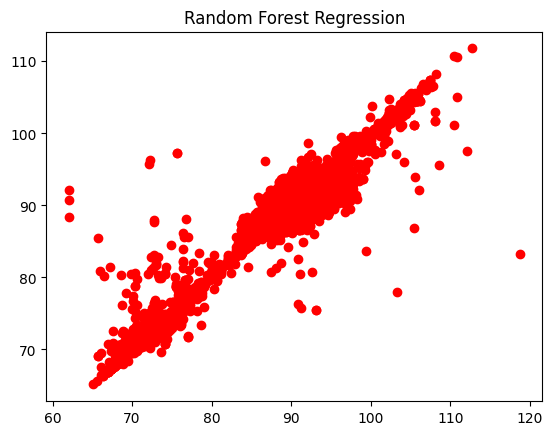

In [104]:
plt.scatter(y_test, pred, color = 'red')
plt.title("Random Forest Regression")
plt.show()